In [1]:
# to get 3d plot to be rotatable (optional)
# %matplotlib widget

In [3]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt

In [3]:
# initialize values
dt = 0.001
x = 0
# v = 0.5
# k = 0.01
# lam = .03         # lambda
# D = .7            # diffusion coefficient

# to initialize random:
v, k, lam, D = [random.uniform(0,1) for _ in range(4)]
print("v:",v, "k:", k, "lam:", lam, "D:", D )

x_list = [x]
v_list = [v]

v: 0.6180535095682471 k: 0.10708029687458642 lam: 0.510129812025557 D: 0.49833154004003055


In [4]:
# update values
n = 300000 # number of time steps

for _ in range(n):
    dW = random.uniform(0,1)
    v = v - (k*x + lam*v)*dt + D*dW
    x = x + v*dt

    x_list.append(x)
    v_list.append(v)

In [5]:
v, x

(-2.5946978234769498, 2319.294466135106)

In [6]:
# different reservoirs to experiment with

def reservoir_0(h, W, u, x_dt, dt):
    return h + np.tanh(W*h + u*x_dt)*dt

def reservoir_1(h, W, u, x_dt, dt):
    return h + math.cos(W*h + u*x_dt)*dt

def reservoir_2(h, W, u, x_dt, dt):
    return h + np.cos(W*h + u*x_dt) * np.tanh(W*h + u*x_dt)*dt

def reservoir_3(h, W, u, x_dt, dt):
    return h + (W*h + u*x_dt)*dt

In [7]:
# reservoir
# initialize values
W = random.uniform(-1,1)
u = random.uniform(-1,1)
h = 0

h_list = [h]

for i, x_dt in enumerate(x_list):
    h = reservoir_2(h, W, u, x_dt, dt)
    h_list.append(h)

In [8]:
# fig = plt.figure()
 
# # syntax for 3-D projection
# ax = plt.axes(projection ='3d')
 
# # defining axes
# x_ = range(len(h_list))[1:]
# y = h_list[1:]
# z = x_list

# ax.set_zlabel("X")
# ax.set_ylabel("Reservoir state")
# ax.set_xlabel("Time Step")
# ax.scatter(x_, y, z)

# plt.show()

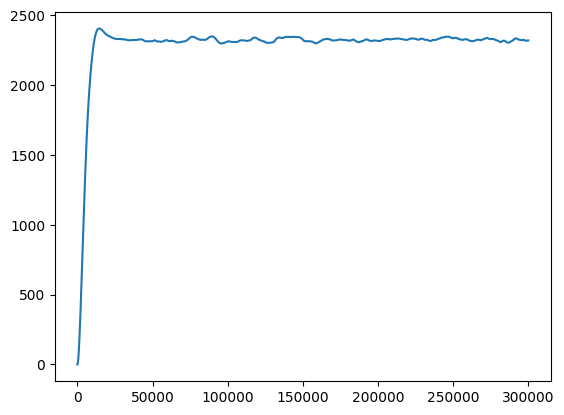

In [9]:
plt.plot(range(len(x_list)), x_list)

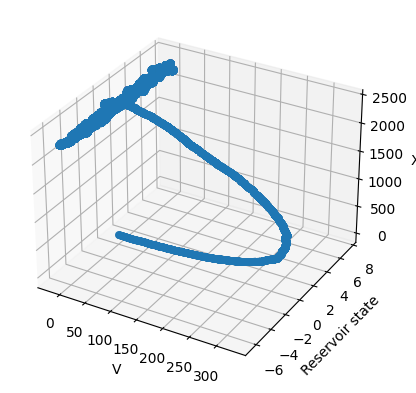

In [10]:
fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
x_ = v_list
y = h_list[1:]
z = x_list

ax.set_xlabel("V")
ax.set_ylabel("Reservoir state")
ax.set_zlabel("X")
ax.scatter(x_, y, z)

plt.show()

### Zooming in on the ball

To switch reservoirs:

In [11]:
# # initialize first reservoir state
# h = 0

# h_list = [h]

# for i, x_dt in enumerate(x_list):
#     h = reservoir_2(h, W, u, x_dt, dt)
#     h_list.append(h)

In [12]:
# enable interactable plots
%matplotlib widget

In [22]:
# number of initial points to skip
skip = 30000
# # plot every nth point
every_nth = 1

Plot X vs V vs reservoir state

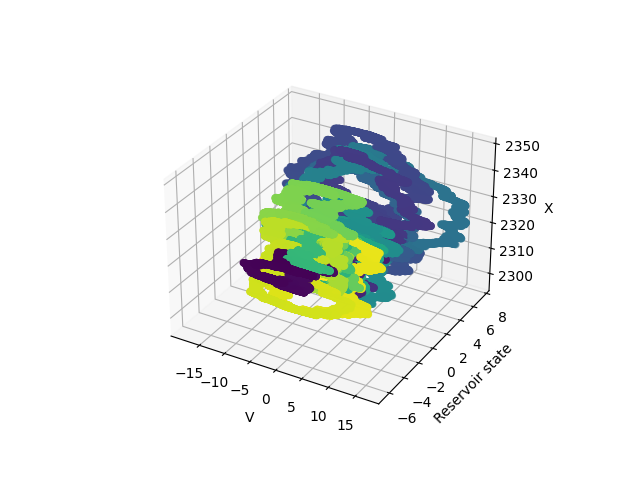

In [23]:
fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# optional: adjust axes to get a better view of points
# ax.set_ylim(bottom=-35, top=-28)
# ax.set_xlim(-1, 0.5)

# defining axes
x_ = v_list
y = h_list[1:]
z = x_list

ax.set_zlabel("X")
ax.set_ylabel("Reservoir state")
ax.set_xlabel("V")

# no colors
# ax.scatter(x_[skip::every_nth], y[skip::every_nth], z[skip::every_nth])
# color by time step
ax.scatter(x_[skip::every_nth], y[skip::every_nth], z[skip::every_nth], c=range(len(h_list))[1+skip::every_nth])

plt.show()

In [15]:
# fig = plt.figure()
 
# # syntax for 3-D projection
# ax = plt.axes(projection ='3d')

# # optional: adjust axes to get a better view of points
# # ax.set_ylim(bottom=-35, top=-28)

 
# # defining axes
# x_ = range(len(h_list))[1:]
# y = h_list[1:]
# z = x_list

# ax.set_zlabel("X")
# ax.set_ylabel("Reservoir state")
# ax.set_xlabel("Time Step")
# ax.scatter(x_[skip::every_nth], y[skip::every_nth], z[skip::every_nth], c=x_[skip::every_nth])

# plt.show()

In [16]:
plt.close('all')

No such comm: 862f08b1f9d247ffb6f1c8fb58ac4b63


Regarding intrinsic dimension:

https://math.umd.edu/~rvbalan/RESEARCH/DimensionEstimation/camastra2016.pdf
https://github.com/notsebastiano/GP_algorithm/blob/master/Test_Example_notebook.ipynb

### Lorenz attractor as input

##### Defining the Lorenz attractor and generating points

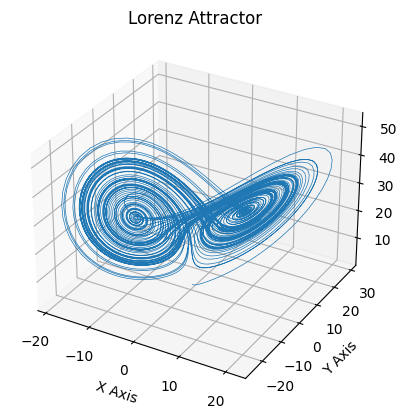

In [4]:
def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0., 1., 1.05)  # Set initial values

# x, y, z = [0] * 10001, [0] * 10001, [0] * 10001
# x[0], y[0], z[0] = xyzs[0]

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt
   #  x[i + 1], y[i + 1], z[i + 1] = xyzs[i + 1]


# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

##### A brief explanation of ```*xyzs.T```:

```xyzs``` is a numpy array which can be thought of as a list of ```[x,y,z]```'s

```xyzs.T``` is the transpose of ```xyzs```

By passing ```*xyzs.T``` into the plotting fuction, we are passing in three lists which correspond to the three axes to plot

##### Initializing reservoir and inputting the Lorenz attractor

In [7]:
# reservoir
# initialize values
W = np.array([random.uniform(-1,1) for _ in range(3)])
u = np.array([random.uniform(-1,1) for _ in range(3)])
h = np.array([0 for _ in range(3)])

h_list = np.empty((num_steps + 2, 3))
h_list[0] = h

for i, xyz in enumerate(xyzs):
    h = reservoir_2(h, W, u, xyz, dt)
    h_list[i+1] = h

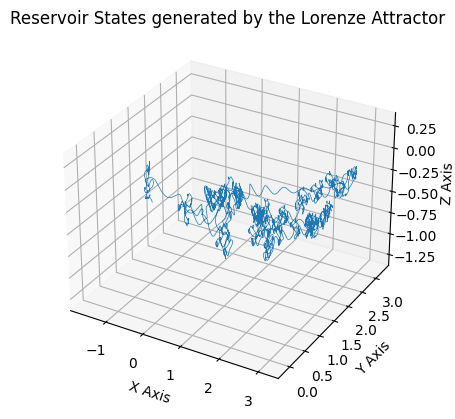

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*h_list.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Reservoir States generated by the Lorenz Attractor")

plt.show()

In [13]:
x, y, z = xyzs.T
h_x, h_y, h_z = h_list.T

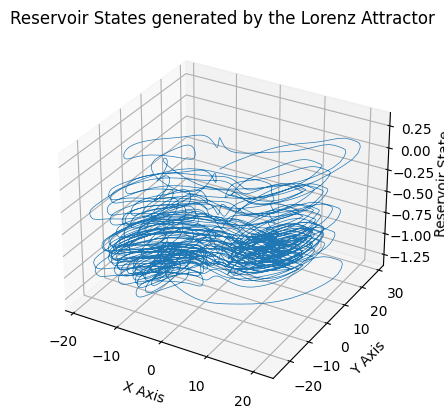

In [19]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(x, y, h_z[:-1], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Reservoir State")
ax.set_title("Reservoir States generated by the Lorenz Attractor")

plt.show()